<a href="https://colab.research.google.com/github/elvinaqa/Hands-MediumON-ML/blob/master/EDA_and_Modelling_(Fixed_Import_Errors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset and Libs

In [2]:
from google.colab import files
files.upload()

Saving task_data.csv to task_data.csv


{'task_data.csv': b'A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,y\r\n437401,2200.0,3 years,  7.40%,68.33,1,6.0,mortgage,58000.0,Not Verified,home_improvement,1.43,0.0,770.0,774.0,2.0,12.0,0.0,441.0,2.8%,20.0,804.0,800.0,0.0,1\r\n1051124,20000.0,5 years, 14.27%,468.17,3,4.0,rent,45000.0,Not Verified,debt_consolidation,10.16,0.0,715.0,719.0,0.0,7.0,0.0,15197.0,88.7%,14.0,624.0,620.0,0.0,0\r\n885906,24000.0,3 years,  7.51%,746.66,1,4.0,mortgage,119500.0,Verified,credit_card,6.01,0.0,755.0,759.0,0.0,9.0,0.0,24488.0,40.3%,23.0,774.0,770.0,0.0,1\r\n383996,4000.0,3 years,  7.68%,124.77,1,0.0,rent,32000.0,Not Verified,major_purchase,5.7,0.0,770.0,774.0,2.0,10.0,0.0,7549.0,14.2%,33.0,754.0,750.0,0.0,1\r\n454629,4800.0,3 years,  8.94%,152.51,1,6.0,mortgage,87000.0,Not Verified,debt_consolidation,10.54,0.0,730.0,734.0,1.0,15.0,0.0,27901.0,40.9%,27.0,679.0,675.0,0.0,1\r\n482719,9000.0,3 years,  7.88%,281.53,1,,mortgage,200000.0,Not Verified,educational,4.18,1.0,735.0,739.0,2.0,9.0,0.0,5663.0,1

# Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from numpy import where
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# !pip install pycaret
# import pycaret
# from pycaret.utils import enable_colab 
# enable_colab()

In [88]:
!pwd

/content


In [6]:
df = pd.read_csv("/content/task_data.csv")

In [7]:
df.head()

A        B        C        D       E  ...     U      V      W    X  y
0   437401   2200.0  3 years    7.40%   68.33  ...  20.0  804.0  800.0  0.0  1
1  1051124  20000.0  5 years   14.27%  468.17  ...  14.0  624.0  620.0  0.0  0
2   885906  24000.0  3 years    7.51%  746.66  ...  23.0  774.0  770.0  0.0  1
3   383996   4000.0  3 years    7.68%  124.77  ...  33.0  754.0  750.0  0.0  1
4   454629   4800.0  3 years    8.94%  152.51  ...  27.0  679.0  675.0  0.0  1

[5 rows x 25 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10000 non-null  int64  
 1   B       10000 non-null  float64
 2   C       10000 non-null  object 
 3   D       10000 non-null  object 
 4   E       10000 non-null  float64
 5   F       10000 non-null  int64  
 6   G       9708 non-null   float64
 7   H       10000 non-null  object 
 8   I       10000 non-null  float64
 9   J       10000 non-null  object 
 10  K       10000 non-null  object 
 11  L       10000 non-null  float64
 12  M       10000 non-null  float64
 13  N       10000 non-null  float64
 14  O       10000 non-null  float64
 15  P       10000 non-null  float64
 16  Q       10000 non-null  float64
 17  R       10000 non-null  float64
 18  S       10000 non-null  float64
 19  T       9985 non-null   object 
 20  U       10000 non-null  float64
 21  V       10000 non-null  float64
 22 

In [9]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'y'],
      dtype='object')

In [10]:
features = df.columns[:-1]
features

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'],
      dtype='object')

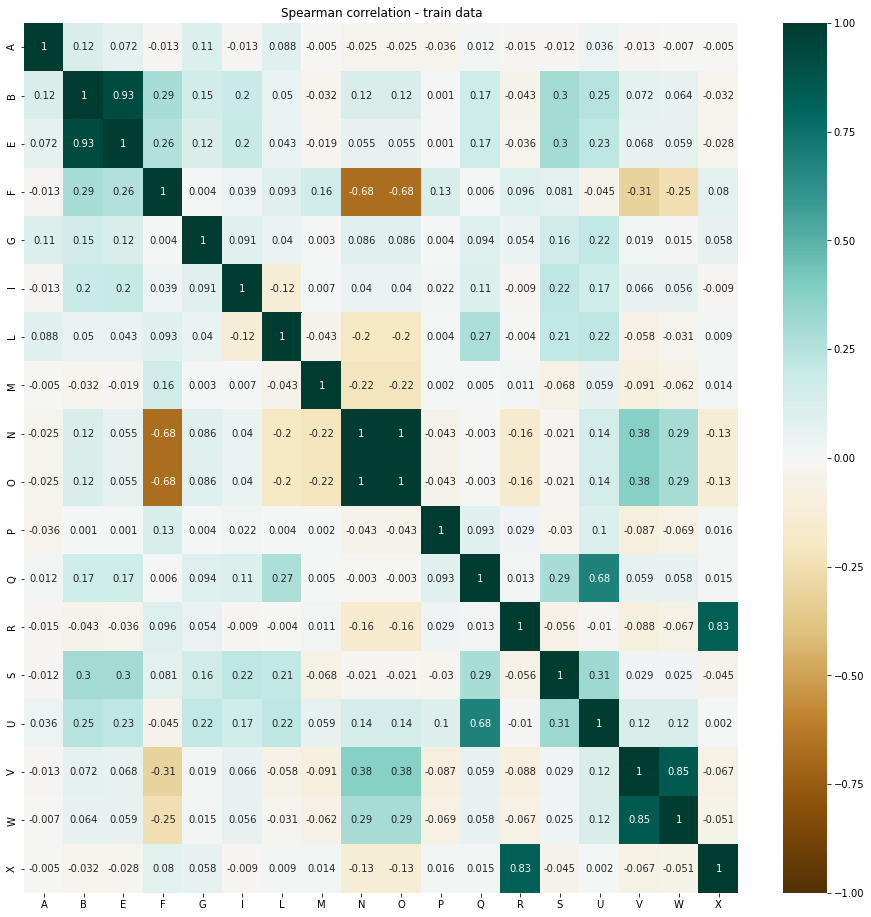

In [11]:
'''The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. 
In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. 
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.'''
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(np.round(df[features].corr(), 3), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlation', fontdict={'fontsize':10}, pad=10)
plt.title("Spearman correlation - train data")
plt.show()

1    8575
0    1425
Name: y, dtype: int64

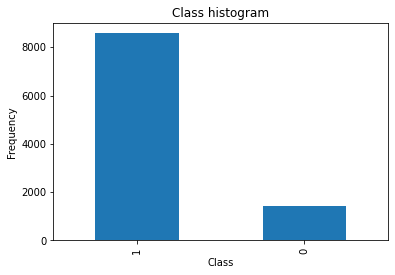

In [12]:
# See Imbalance
pd.value_counts(df['y']).plot.bar()
plt.title('Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['y'].value_counts()

## Preprocessing and Feature Engineering

In [13]:
df.head()

A        B        C        D       E  ...     U      V      W    X  y
0   437401   2200.0  3 years    7.40%   68.33  ...  20.0  804.0  800.0  0.0  1
1  1051124  20000.0  5 years   14.27%  468.17  ...  14.0  624.0  620.0  0.0  0
2   885906  24000.0  3 years    7.51%  746.66  ...  23.0  774.0  770.0  0.0  1
3   383996   4000.0  3 years    7.68%  124.77  ...  33.0  754.0  750.0  0.0  1
4   454629   4800.0  3 years    8.94%  152.51  ...  27.0  679.0  675.0  0.0  1

[5 rows x 25 columns]

## Encode categorical columns and convert to Numeric

In [14]:
# Remove string
df['C'] = df['C'].str[:-5]
df['D'] = df['D'].str[:-1]
df['T'] = df['T'].str[:-1]
# Convert to Numeric
for col in ['C', 'D', 'T']:
  df[col] = pd.to_numeric(df[col])

# for col_name in df.columns:
#     if(df[col_name].dtype == 'object'):
#         df[col_name]= df[col_name].astype('category')
#         df[col_name] = df[col_name].cat.codes

In [17]:
# Normalize
from sklearn.preprocessing import StandardScaler, RobustScaler
features_to_scale = ['A', 'B', 'E', 'L', 'N', 'O', 'Q', 'S', 'T', 'V', 'W']
for col in features_to_scale:
  df[col] = StandardScaler().fit_transform((df[col].values.reshape(-1, 1)))

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

for col in ['B', 'D','I','U']:
  df[col] = rob_scaler.fit_transform(df[col].values.reshape(-1,1))

In [18]:
df.head()

A         B  C         D  ...         V         W    X  y
0 -1.170959 -0.821053  3 -0.825926  ...  1.425153  1.032411  0.0  1
1  1.771331  1.052632  5  0.446296  ... -0.873812 -0.515599  0.0  0
2  0.979249  1.473684  3 -0.805556  ...  1.041992  0.774409  0.0  1
3 -1.426991 -0.631579  3 -0.774074  ...  0.786551  0.602408  0.0  1
4 -1.088365 -0.547368  3 -0.540741  ... -0.171351 -0.042596  0.0  1

[5 rows x 25 columns]

## Encode Categorical Features

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['H', 'J', 'K']:
  le.fit(df[col])
  df[col] = le.transform(df[col])

In [20]:
df.head()

A         B  C         D  ...         V         W    X  y
0 -1.170959 -0.821053  3 -0.825926  ...  1.425153  1.032411  0.0  1
1  1.771331  1.052632  5  0.446296  ... -0.873812 -0.515599  0.0  0
2  0.979249  1.473684  3 -0.805556  ...  1.041992  0.774409  0.0  1
3 -1.426991 -0.631579  3 -0.774074  ...  0.786551  0.602408  0.0  1
4 -1.088365 -0.547368  3 -0.540741  ... -0.171351 -0.042596  0.0  1

[5 rows x 25 columns]

## Encode Categorical (Number) Features

In [21]:
for col in ['C', 'F', 'G', 'M', 'P','R', 'X']:
  df[col] = df[col].astype('category').cat.codes

In [22]:
df

A         B  C         D  ...         V         W  X  y
0    -1.170959 -0.821053  0 -0.825926  ...  1.425153  1.032411  0  1
1     1.771331  1.052632  1  0.446296  ... -0.873812 -0.515599  0  0
2     0.979249  1.473684  0 -0.805556  ...  1.041992  0.774409  0  1
3    -1.426991 -0.631579  0 -0.774074  ...  0.786551  0.602408  0  1
4    -1.088365 -0.547368  0 -0.540741  ... -0.171351 -0.042596  0  1
...        ...       ... ..       ...  ...       ...       ... .. ..
9995 -0.178557  1.578947  0 -0.277778  ...  0.978132  0.731409  0  1
9996 -0.398053 -0.526316  1 -1.053704  ... -1.129253 -0.687600  0  1
9997  0.992850  0.210526  0 -0.970370  ...  0.403390  0.344406  0  1
9998  1.510380  0.526316  0 -0.733333  ... -1.065393 -0.644600  0  0
9999  0.899920  0.526316  0 -0.733333  ...  0.211810  0.215406  0  1

[10000 rows x 25 columns]

In [23]:
continuous = ['A', 'B','D','E', 'I', 'L', 'N', 'O', 'Q', 'S','T', 'U', 'V', 'W']
cat = ['C', 'F', 'G', 'H', 'J', 'K', 'M', 'P', 'R', 'X']

In [24]:
def plot_feature_distribution(df1, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(5, 3,figsize=(14, 24))

    for feature in features:
        i += 1
        plt.subplot(5, 3,i)
        sns.distplot(df[feature],color="orange", kde=True,bins=60, label='train')
        plt.xlabel(feature, fontsize=9); plt.legend()
    plt.show();

In [89]:
# Numerical predictors
numerical_predictors = continuous
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=15, cols=2, subplot_titles=numerical_predictors)

for i, col in enumerate(continuous):
    fig.add_trace(
        go.Histogram(x=df[col]), 
        i//2 + 1, i%2 + 1)
    
fig.update_layout(
    title_text='Numerical Predictors Distribution',
    height=1200,
    showlegend=False)

## Missing Value Imputation

In [27]:
# df = df.fillna(-999)
# from sklearn.impute import SimpleImputer
# df = SimpleImputer(missing_value = np.nan, strategy = 'mean').fit_transform(df)
# df_imp = df.copy()

In [28]:
df.isna().sum()

A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
O     0
P     0
Q     0
R     0
S     0
T    15
U     0
V     0
W     0
X     0
y     0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
# df
# df_m = df.copy()
# df_bfm = df.copy()
# df = df_m.copy()

## Notes
* Create a 50/50 sub-dataframe ratio of "1" and "0" classes.
* Determine the Classifiers we are going to use and decide which one has a higher accuracy.

* Create a Neural Network and compare the accuracy to our best classifier.

We Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

## Outlier Detection

In [31]:
new_df = df.copy()

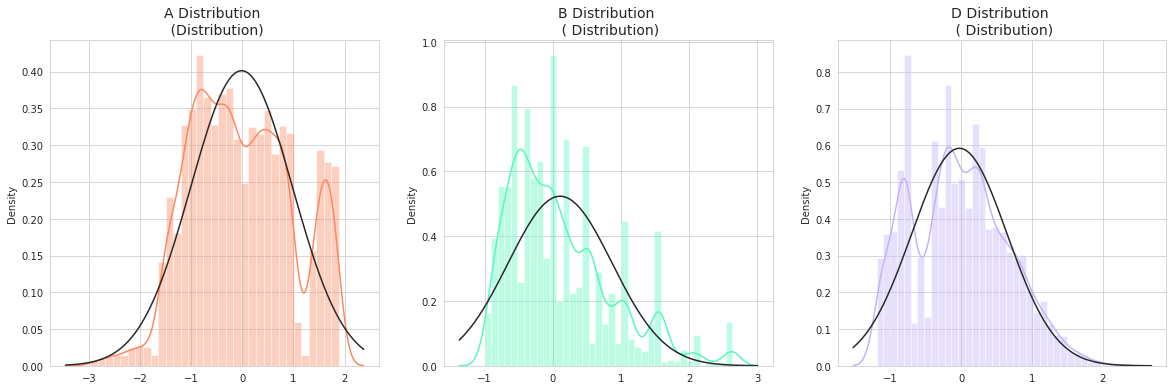

In [90]:
import seaborn as sns
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_dist = new_df['A'].loc[new_df['y'] == 1].values
sns.distplot(v14_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('A Distribution \n (Distribution)', fontsize=14)

v12_dist = new_df['B'].loc[new_df['y'] == 1].values
sns.distplot(v12_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('B Distribution \n ( Distribution)', fontsize=14)


v10_dist = new_df['D'].loc[new_df['y'] == 1].values
sns.distplot(v10_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('D Distribution \n ( Distribution)', fontsize=14)

plt.show()

In [33]:
# # -----> A Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['A'].loc[new_df['y'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

# new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
# print('----' * 44)

Quartile 25: -0.7947687628163442 | Quartile 75: 0.717209148956256
iqr: 1.5119779117726002
Cut Off: 2.2679668676589
V14 Lower: -3.0627356304752444
V14 Upper: 2.9851760166151564
Feature V14 Outliers for Cases: 0
V10 outliers:[]


In [35]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'y'],
      dtype='object')

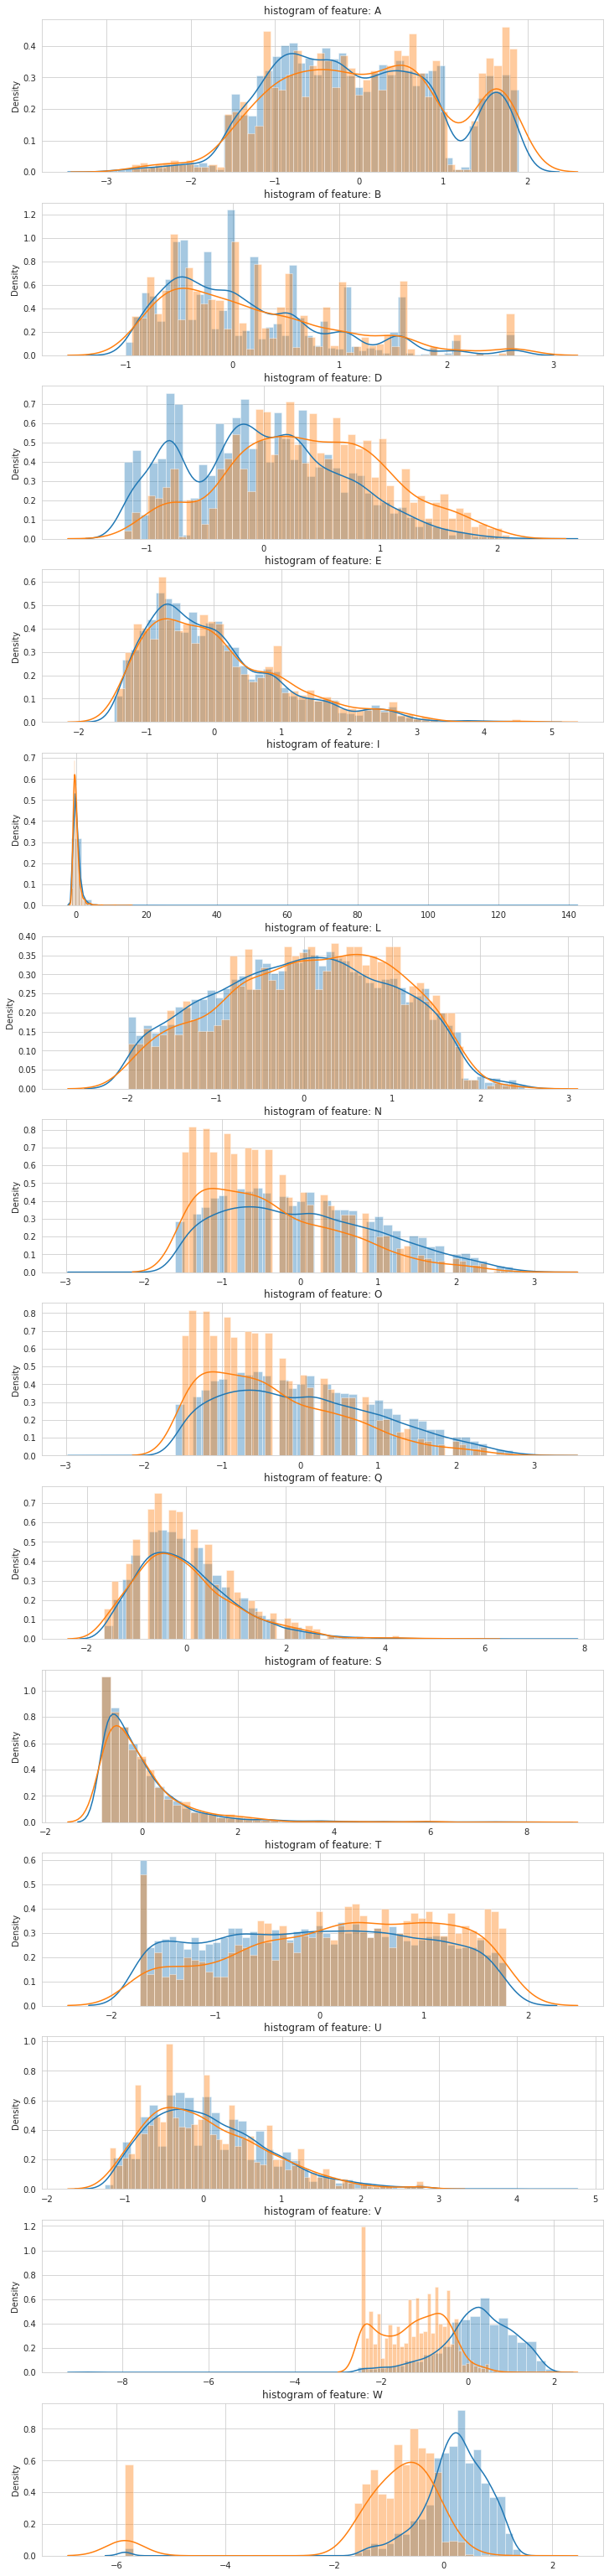

In [117]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(continuous):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.y == 1], bins=50)
    sns.distplot(df[cn][df.y == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [37]:
# Distribution
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.append_trace(
    go.Histogram(x=df['y']), 
    1, 1)

fig.append_trace(
    go.Box(x=df['y'], name='y'),
    2, 1)

fig.update_layout(title_text='Target Distribution', showlegend=False)

In [86]:
# Numerical predictors

numerical_predictors = continuous
fig = make_subplots(rows=20, cols=2, subplot_titles=numerical_predictors)

for i, col in enumerate(numerical_predictors):
    fig.add_trace(
        go.Histogram(x=df[col]), 
        i//2 + 1, i%2 + 1)
    
fig.update_layout(
    title_text='Numerical Predictors Distribution',
    height=1200,
    showlegend=False)

In [39]:
# Categorical predictors
# categorical_predictors = [p for p in predictors if 'cat' in p]
categorical_predictors = cat
fig = make_subplots(rows=5, cols=2, subplot_titles=categorical_predictors)

for i, col in enumerate(categorical_predictors):
    fig.add_trace(
        go.Histogram(x=df[col]), 
        i//2 + 1, i%2 + 1)
    
fig.update_layout(
    title_text='Categorical Predictors Distribution',
    height=1000,
    showlegend=False)

## Feature Importance - PCA


In [40]:
ex_df = df.copy()

In [41]:
# ex_df = ex_df.fillna(-999)
# Scaled Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ex_df.drop('y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_data = scaler.transform(ex_df.drop('y',axis=1))

In [43]:
# Dimensionality Reduction and Clustering:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
x_pca = pca.transform(scaled_data)

In [45]:
x_pca.shape

(9985, 2)

Text(0, 0.5, 'Second Principal Component')

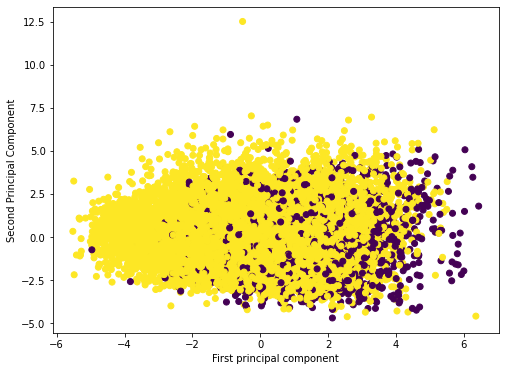

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=ex_df['y'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Defining Target and Predictors

In [47]:
X = np.array(df.drop(['y'], axis=1))
y = np.array(df['y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (9985, 24)
Shape of y: (9985,)


## Oversampling with SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



Number transactions X_train dataset:  (7988, 24)
Number transactions y_train dataset:  (7988,)
Number transactions X_test dataset:  (1997, 24)
Number transactions y_test dataset:  (1997,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6841
Before OverSampling, counts of label '0': 1147 

After OverSampling, the shape of train_X: (13682, 24)
After OverSampling, the shape of train_y: (13682,) 

After OverSampling, counts of label '1': 6841
After OverSampling, counts of label '0': 6841


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [52]:
# !pip install pycaret
# import pycaret
# from pycaret.utils import enable_colab 
# enable_colab()

# Modeling 

## Logistic Regression with GridsearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = { 'C': np.linspace(1, 10, 10) }

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    8.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [54]:
clf.best_params_

{'C': 6.0}

In [55]:
lr1 = LogisticRegression(C=6,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [56]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 84.43210057009209%


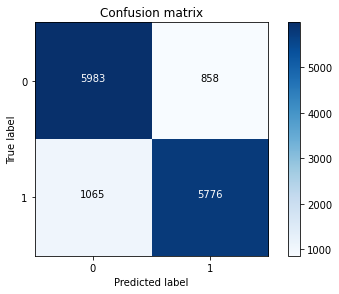

In [58]:
y_train_pre = lr1.predict(X_train_res)
cnf_matrix_tra = confusion_matrix(y_train_res, y_train_pre)
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 85.43238537434706%


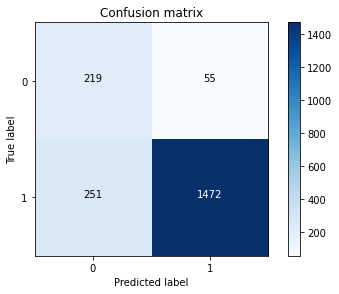

In [59]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [60]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


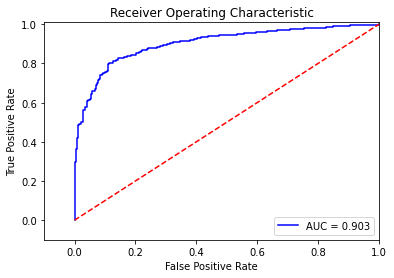

ROC AUC score:  0.9025867291390419


In [61]:
y_pred_sample_score = tmp.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("ROC AUC score: ", roc_auc)


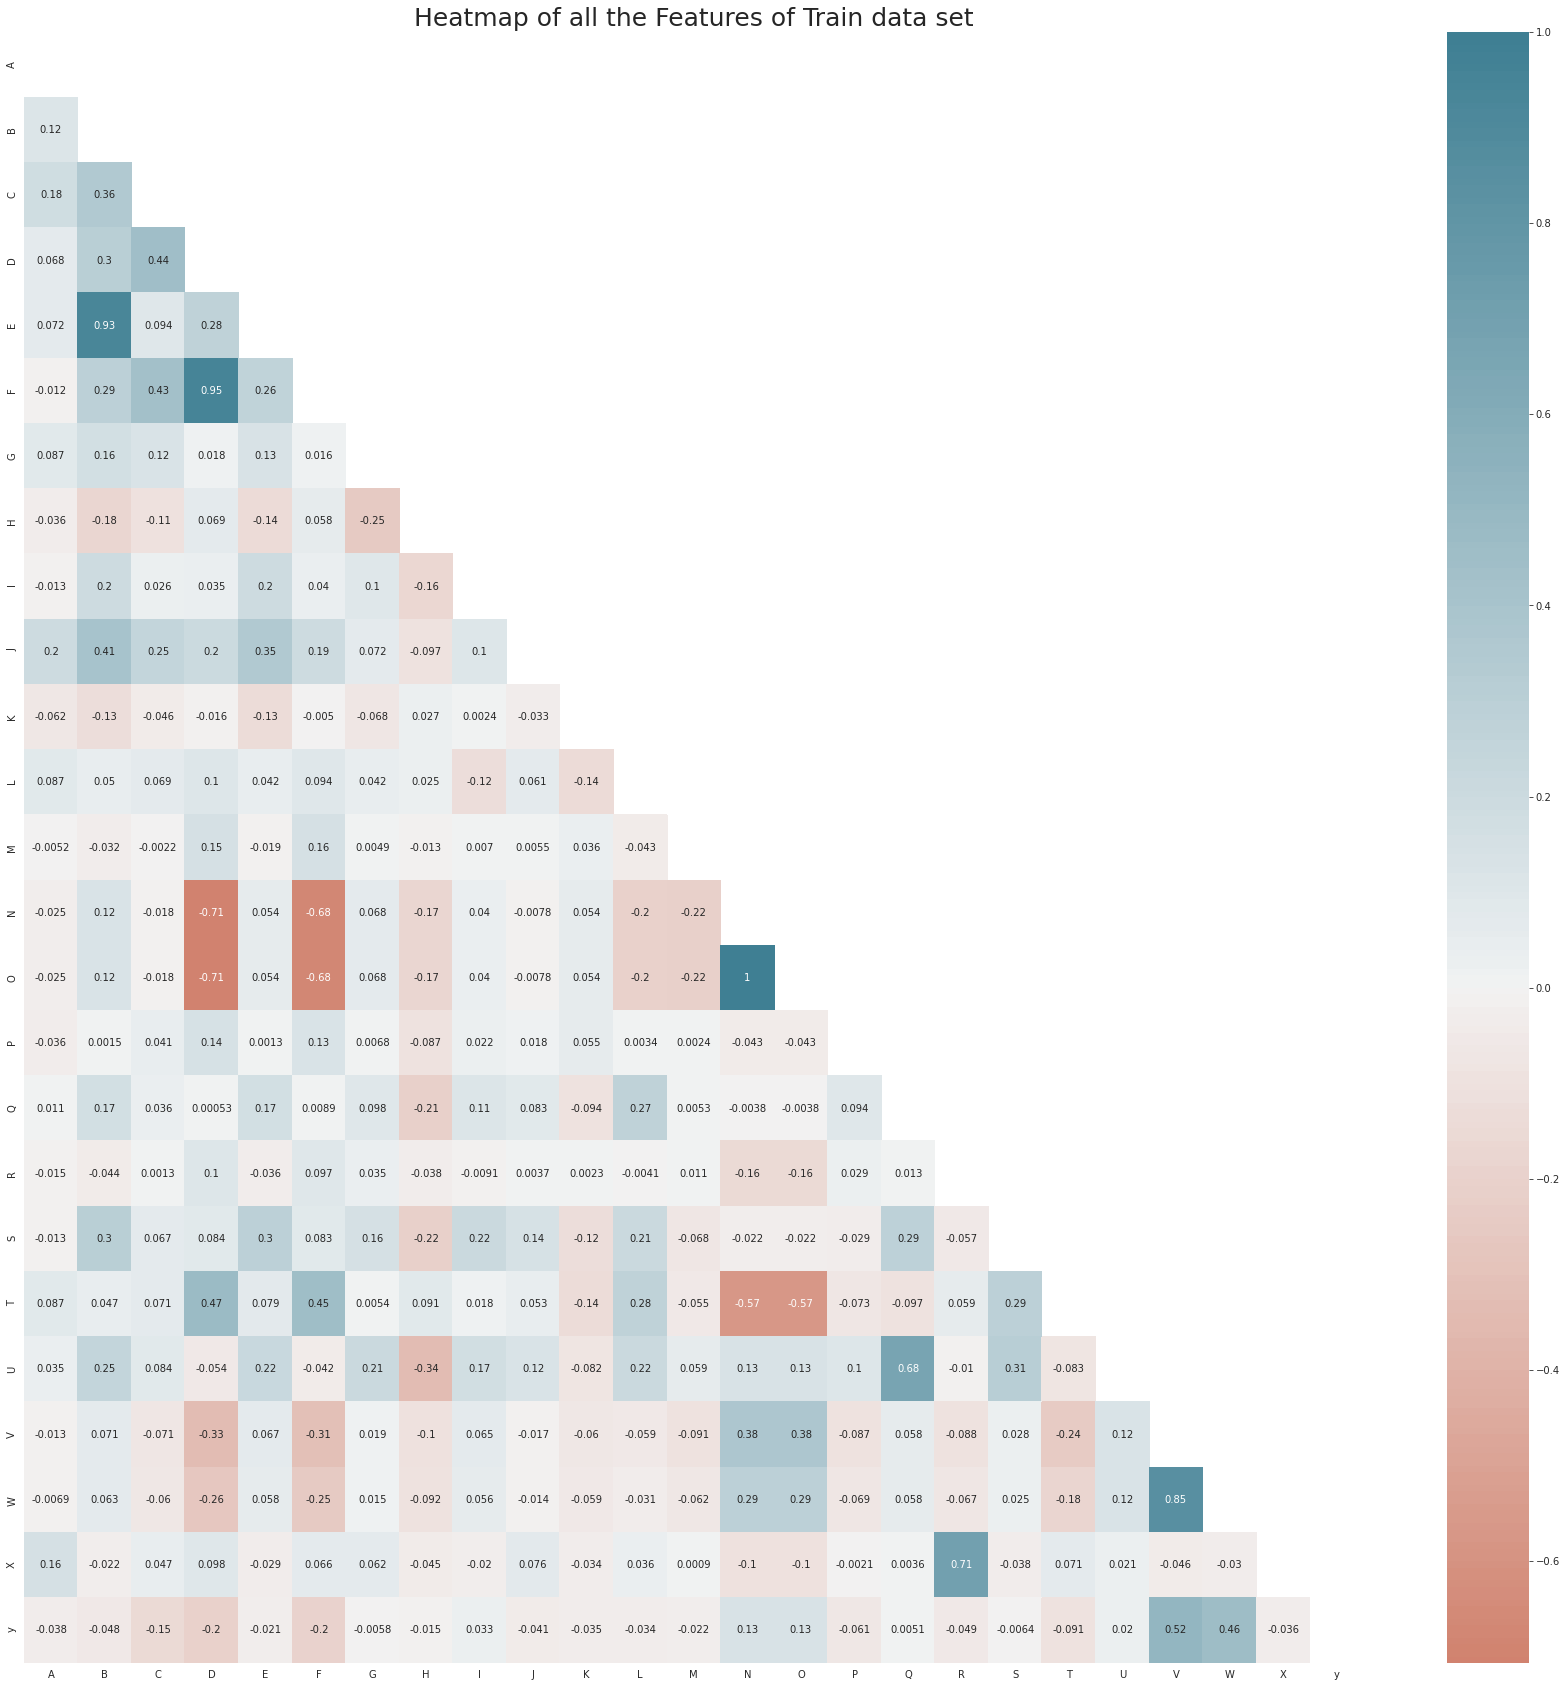

In [63]:
# style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

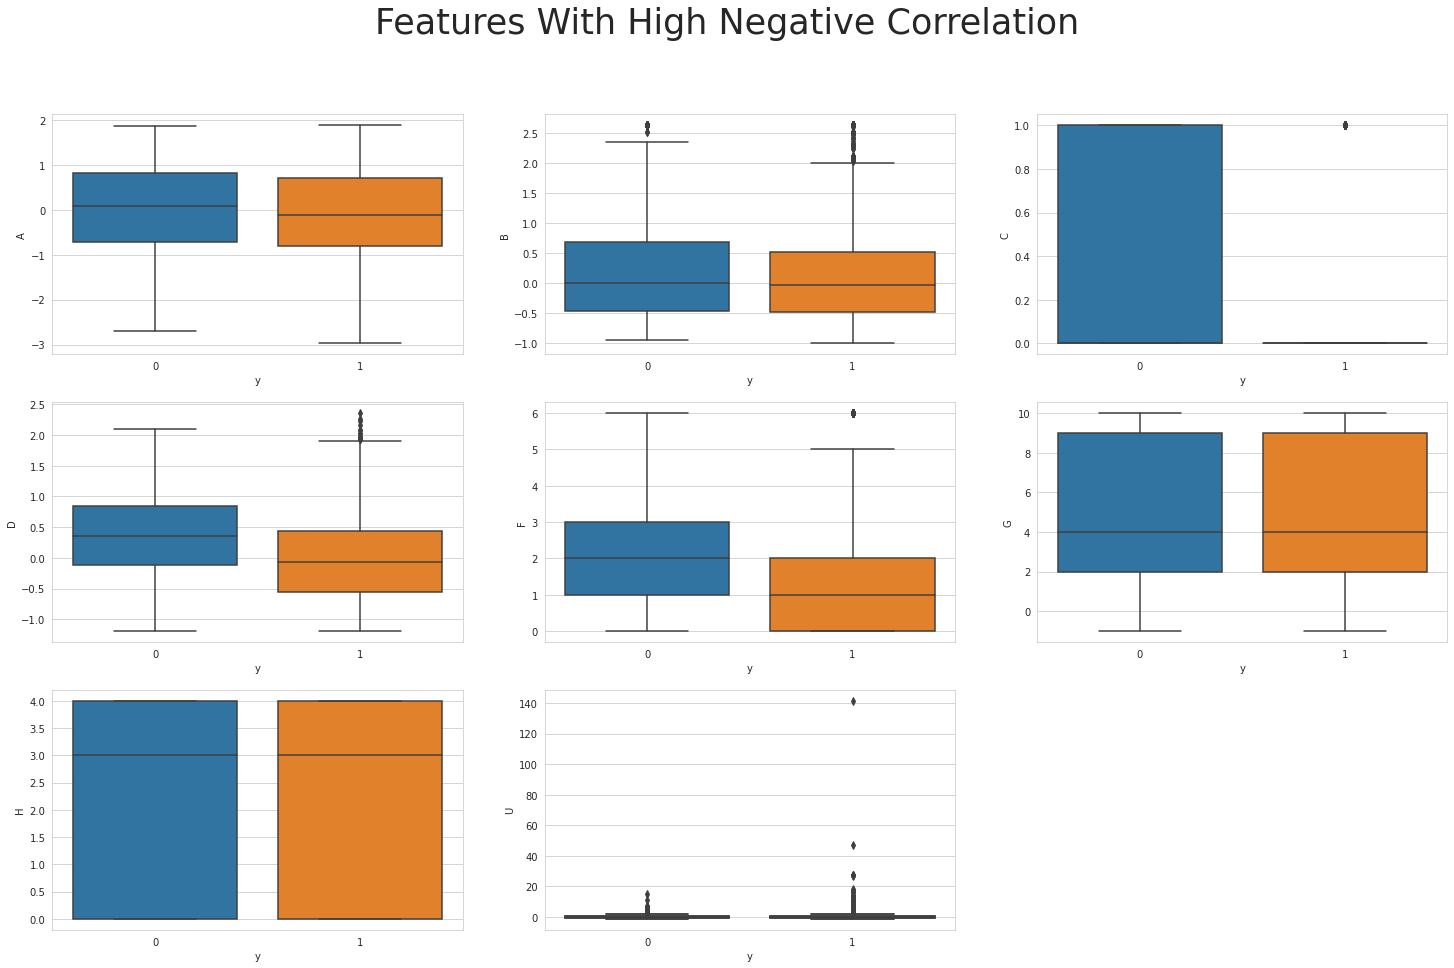

In [118]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="y", y="A", data=df, ax=axes[0,0])
sns.boxplot(x="y", y="B", data=df, ax=axes[0,1])
sns.boxplot(x="y", y="C", data=df, ax=axes[0,2])
sns.boxplot(x="y", y="D", data=df, ax=axes[1,0])
sns.boxplot(x="y", y="F", data=df, ax=axes[1,1])
sns.boxplot(x="y", y="G", data=df, ax=axes[1,2])
sns.boxplot(x="y", y="H", data=df, ax=axes[2,0])
sns.boxplot(x="y", y="I", data=df, ax=axes[2,1])

sns.boxplot(x="y", y="U", data=df, ax=axes[2,1])

f.delaxes(axes[2,2])

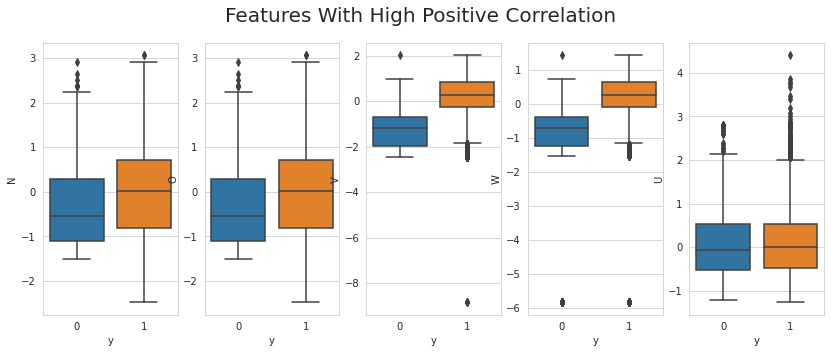

In [65]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=5, figsize=(14,5))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="y", y="N", data=df, ax=axes[0])
sns.boxplot(x="y", y="O", data=df, ax=axes[1])
sns.boxplot(x="y", y="V", data=df, ax=axes[2])
sns.boxplot(x="y", y="W", data=df, ax=axes[3])
sns.boxplot(x="y", y="U", data=df, ax=axes[4])

<Figure size 432x288 with 0 Axes>

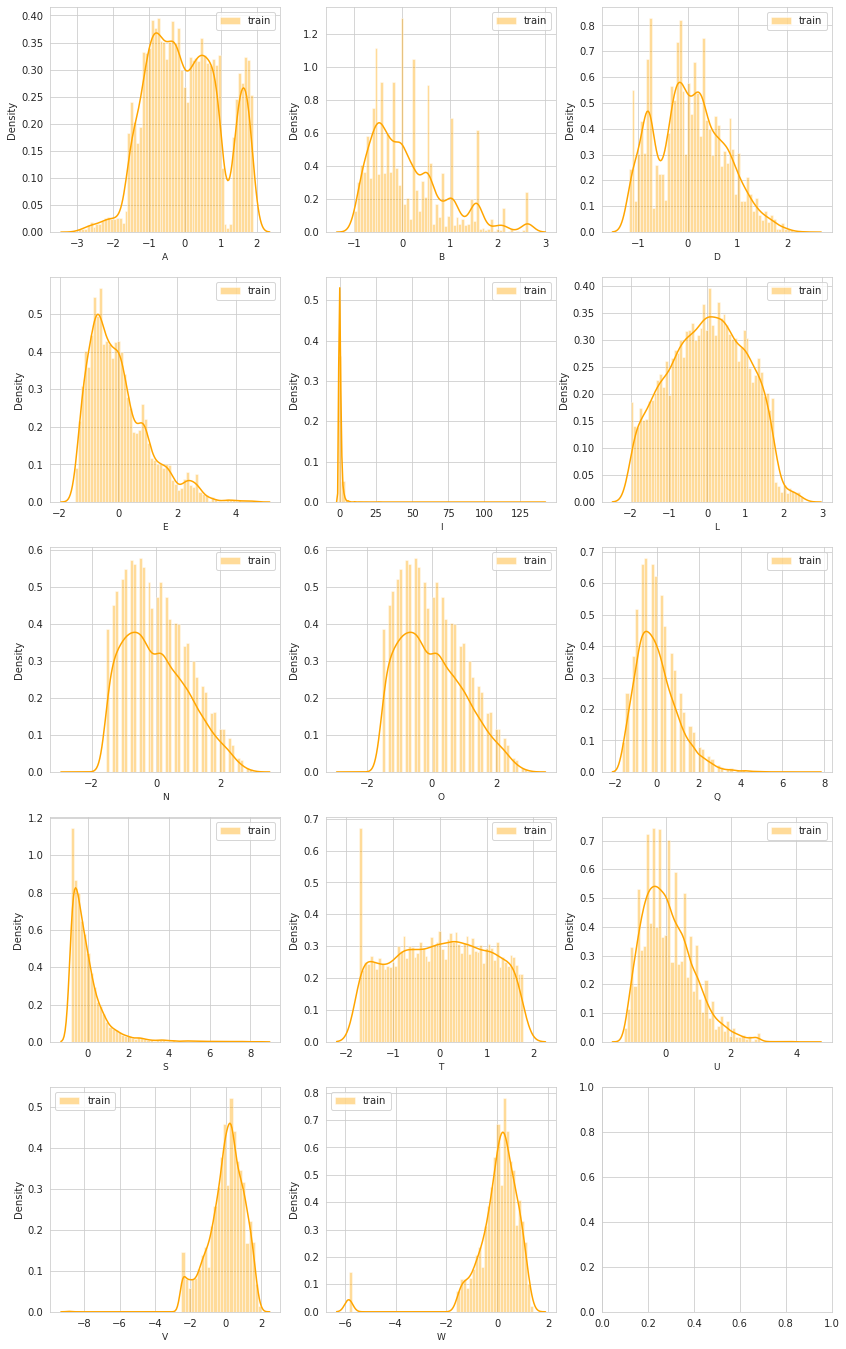

In [84]:
def plot_feature_distribution(df1, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(5, 3,figsize=(14, 24))

    for feature in features:
        i += 1
        plt.subplot(5, 3,i)
        sns.distplot(df[feature],color="orange", kde=True,bins=60, label='train')
        plt.xlabel(feature, fontsize=9); plt.legend()
    plt.show();
plot_feature_distribution(df,continuous)

Plot Categorical

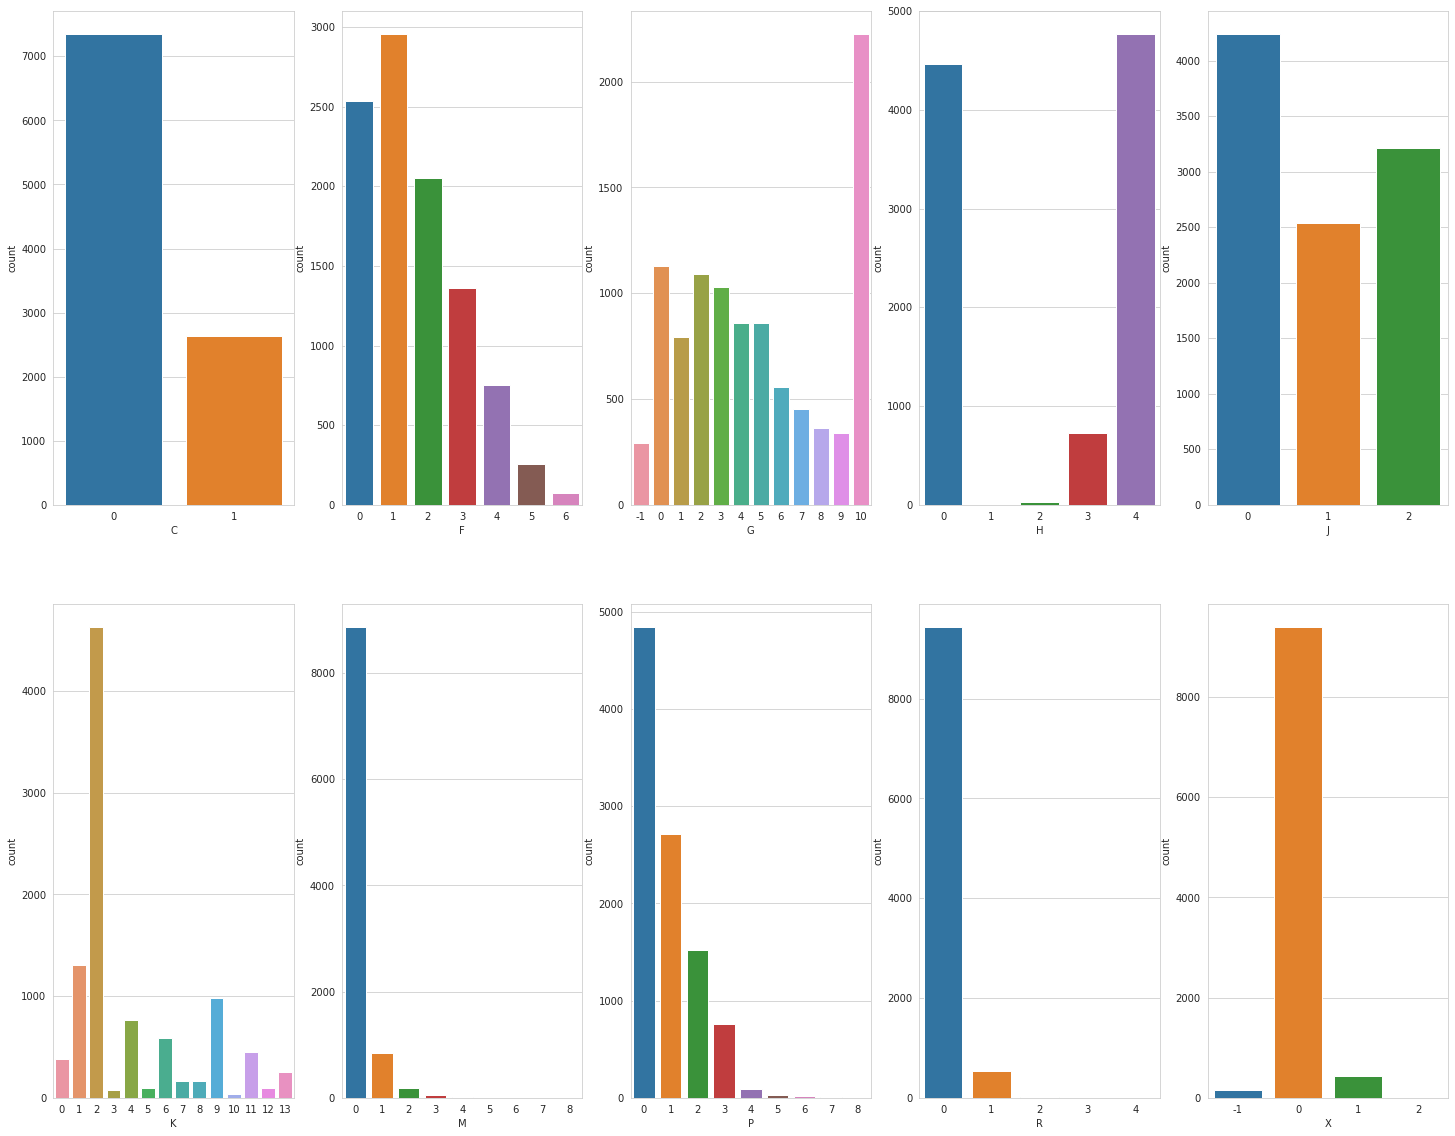

In [85]:
# plt.style.use("ggplot")
plt.figure(figsize=(25,20))
for i,feature in enumerate(cat):
    plt.subplot(2,5,i+1)
    sns.countplot(df[feature])

In [72]:
def distribution3(feature,category,df=df):
    plt.subplots(figsize=(15, 7))
    sns.histplot(df,x=feature,hue=category)

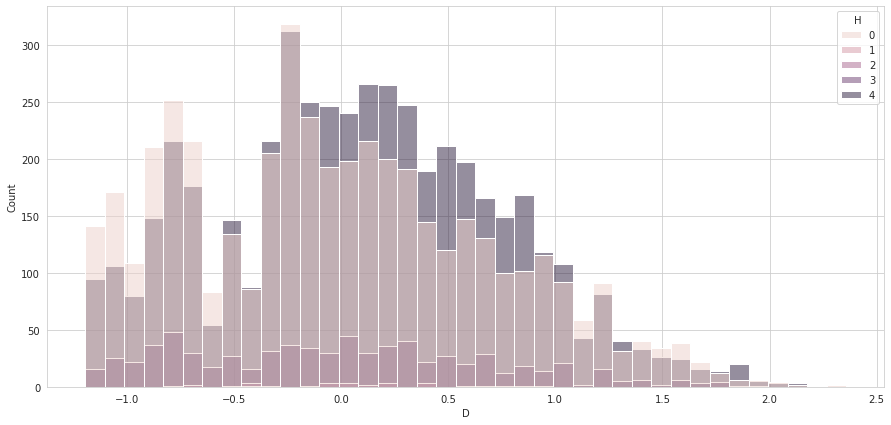

In [73]:
distribution3('D','H')

In [74]:
def boxploting1(feature,category,df=df,figure_size=(15,7)):
    plt.subplots(figsize=figure_size)
    sns.boxplot(x=feature, y=category, data=df,whis=[0, 100], width=.6, palette="vlag")

> LogisticRegression() LinearDiscriminantAnalysis()
KNeighborsClassifier()
RandomForestClassifier()
DecisionTreeClassifier()

>XGBClassifier()
GaussianNB()
GradientBoostingClassifier()
LGBMClassifier()

In [75]:
def Definedata():
    # define dataset
    X=df.drop(columns=['y']).values
    y=df['y'].values
    return X, y

In [76]:
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [77]:
# SMOTE()
# SMOTE() = (X_train1, X_test1, y_train1, y_test1)

In [138]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 16},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Recall Accuracy score for Trainingset: {}'.format(recall_score(model.predict(X_train), y_train)))
    
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax2)
    g2.set_ylabel('Total = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Recall Accuracy score for Testingset: {}'.format(recall_score(model.predict(X_test), y_test)))

    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax3)
    g3.set_ylabel('Total = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Recall Accuracy score for Totalset: {}'.format(recall_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)
    
def Featureimportances(models, X_train, y_train):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df.columns[:24]
    imp = pd.DataFrame({'Features': features, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

## Logistic Regression without GridSearchCV

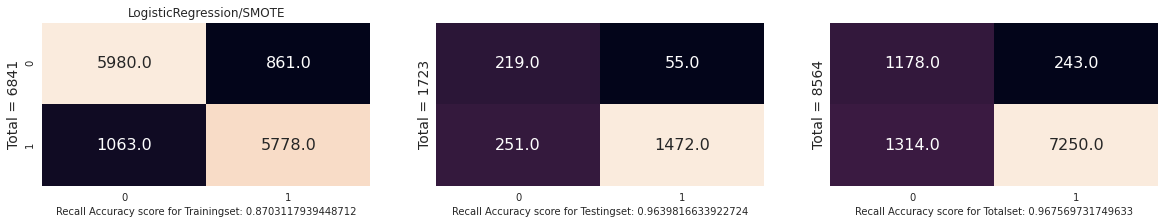

CPU times: user 1.07 s, sys: 690 ms, total: 1.76 s
Wall time: 980 ms


(array([1, 0, 1, ..., 1, 0, 1]), array([1, 0, 1, ..., 1, 0, 1]))

In [139]:
title = 'LogisticRegression/SMOTE'
%time Models(LogisticRegression(),X_train_res, X_test, y_train_res, y_test, title)

## XGBoost Classifier

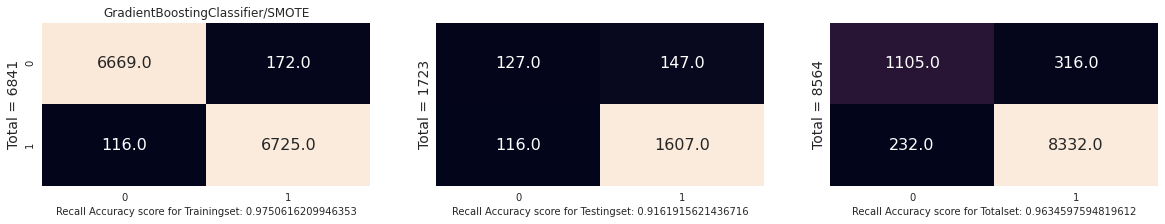

CPU times: user 4.41 s, sys: 121 ms, total: 4.53 s
Wall time: 4.44 s


(array([1, 0, 1, ..., 1, 0, 1]), array([1, 0, 1, ..., 1, 0, 1]))

In [140]:
title = 'GradientBoostingClassifier/SMOTE'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train_res, X_test, y_train_res, y_test, title)

In [108]:
%time Featureimportances(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train_res, y_train_res)

CPU times: user 3.49 s, sys: 518 µs, total: 3.49 s
Wall time: 3.51 s


Features  Importance  Sum Importance
7         H    0.001603        0.188211
17        R    0.003420        0.472484
6         G    0.005188        0.186608
8         I    0.005785        0.193997
16        Q    0.005785        0.469064
18        S    0.005840        0.478324
11        L    0.006914        0.351752
1         B    0.007479        0.020006
19        T    0.008026        0.486350
20        U    0.009635        0.495985
4         E    0.010897        0.163683
23        X    0.012039        1.000000
0         A    0.012527        0.012527
12        M    0.014231        0.365983
14        O    0.014242        0.401258
5         F    0.017737        0.181420
2         C    0.019812        0.039818
13        N    0.021033        0.387016
10        K    0.023588        0.344838
15        P    0.062020        0.463279
3         D    0.112968        0.152786
9         J    0.127254        0.321250
21        V    0.131872        0.627858
22        W    0.360103        0.987961

In [113]:
imp = %time Featureimportances(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train_res, y_train_res)

CPU times: user 3.92 s, sys: 119 µs, total: 3.92 s
Wall time: 4.08 s


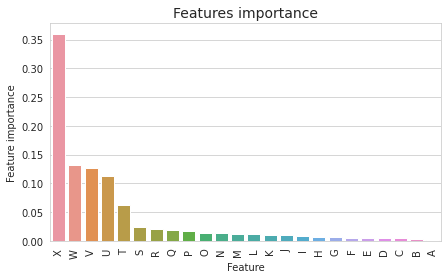

In [115]:
tmp = pd.DataFrame({'Feature': features, 'Feature importance': imp['Importance']})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Note: 
If prediction set will have the X feature, then keeping X in the train set wouldnt be a problem in terms of Data Leakage. Otherwise, obviously, this would be problematic to rely on this model's performance. In the first case, probably I'd go for k-fold stratified cross-validation with pipeline build.

## Multi Layer Perceptron

In [83]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc

0.922228670922809

I have other methods left to test out, such as TabNet, conversion of data to 3D for CNNs, an optimized NN model and few more. I can further can be improved to 96+, with more effort on feature engineering and optimized modelling. 